# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Couchard Darious - __[Darius.Couchard@ulb.be](mailto:Darius.Couchard@ulb.be) - Student ID 425366__
### Donne Stefano - __[Stefano.Donne@ulb.be](mailto:Stefano.Donne@ulb.be) - Student ID 408801__
### Parent Paul - __[Paul.Parent@ulb.be](mailto:Paul.Parent@ulb.be) - Student ID 495257__


## -This section aims to assess and compare the performances of the models implemented in the sections 2.1, 2.2 and 2.3

In [2]:
library(randomForest)
library(caret)
library(e1071)
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv") # load validation set
column_to_drop<-c("X.1","X")
# Dropped "X.1","X" because they just represent the row numbers
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns on validation set

### Random Forest

In [5]:
load("4-Models/random_forest.RData") # load Random Forest trained model -> name : classifierRF

pred <- predict(classifierRF,validation_set, type = "class") # Random Forest model prediction on validation set


cmRF <- confusionMatrix(data=pred, reference = factor(validation_set$id)) # Random Forest Confusion Matrix on validation set


kpRF <- cmRF$overall["Kappa"] # Cohen's Kappa coefficient, allows to indicate the level of agreement between prediction and expected
                          # Allows to take into account the proportion of false negative https://thenewstack.io/cohens-kappa-what-it-is-when-to-use-it-and-how-to-avoid-its-pitfalls/
acRF <- cmRF$overall["Accuracy"] # Accuracy (CM diagonal)

classRF <- cmRF$byClass # Interesting metrics to characterize each class predictions

sensRF <- classRF[,'Sensitivity'] # Sensitivity = (True Positive)/(True Positive + False Negative) per class (= Recall here)

cmRF$table # Confusion Matrix displayed 
#classRF
acRF
kpRF


                         Reference
Prediction                functional functional needs repair non functional
  functional                    5784                     549           1152
  functional needs repair        125                     224             43
  non functional                 614                     144           3475

Accuracy 
0.7830718

Kappa 
0.590566

### SVM

In [4]:
load("4-Models/svm_poly_classifier.RData") # loads SVM classifier -> name: svm_model_poly

pred <- predict(svm_model_poly, validation_set, probability=TRUE) # SVM prediction on validation set

cmSVM <- confusionMatrix(data=pred, reference=factor(validation_set$id[-1]))

kpSVM <- cmSVM$overall["Kappa"] 
acSVM <- cmSVM$overall["Accuracy"]
sensSVM <- cmSVM$byClass[,'Sensitivity']
cmSVM$table
acSVM
kpSVM

                         Reference
Prediction                functional functional needs repair non functional
  functional                    5560                     709           2191
  functional needs repair         29                      29             24
  non functional                 934                     179           2455

Accuracy 
0.6642444

Kappa 
0.3411024

Around 66% of accuracy for the SVM classification. There are issues with the "functional needs repair" class.

### Neural Network

In [6]:
load("4-Models/nn_model_classifier.RData") # load Neural network trained model -> name : nn_model_classifier

pred_nn11 <- predict(nn11, validation_set, type = "class")

cmNN <- confusionMatrix(table(pred_nn11, validation_set$id))

kpNN <- cmNN$overall["Kappa"] 
acNN <- cmNN$overall["Accuracy"]
sensNN <- cmNN$byClass[,'Sensitivity']
cmNN$table
acNN
kpNN

                         
pred_nn11                 functional functional needs repair non functional
  functional                    5781                     655           1422
  functional needs repair         81                      79             32
  non functional                 661                     183           3216

Accuracy 
0.7494633

Kappa 
0.5181923

## -Models comparison :
#### The following plots are a good way to synthetize the predictions made on the evaluation set for each model.
#### The Accuracy is the principal metric to assess the models performances.
#### But the Cohen's Kappa coefficient and the Sensitivity are also interesting to have a more in-depth analysis of the predictions with a consideration for false-positive and false-negative occurences.

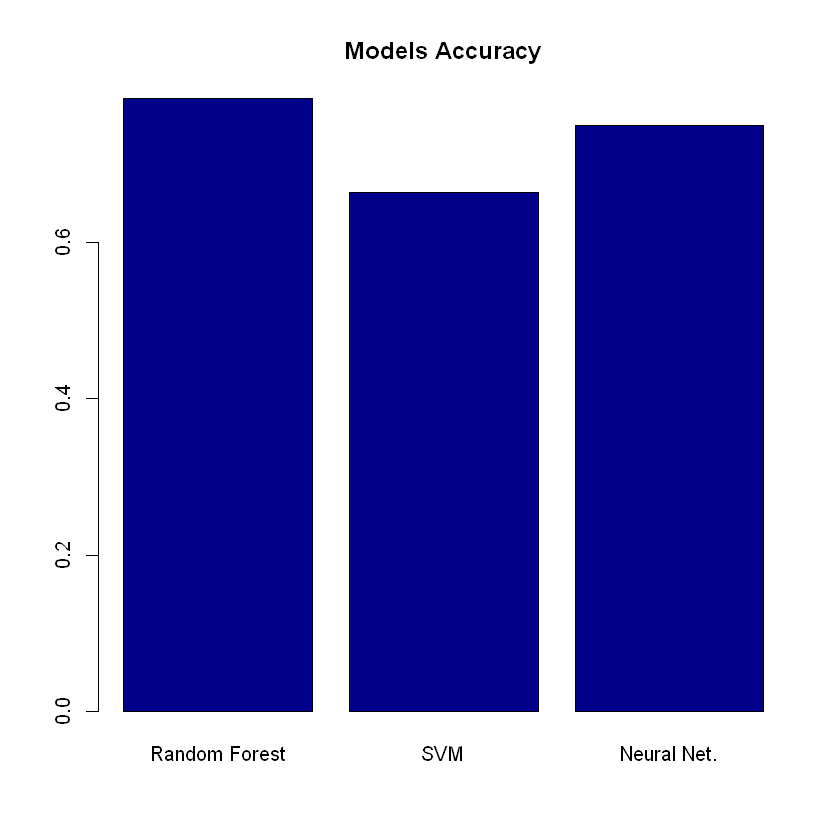

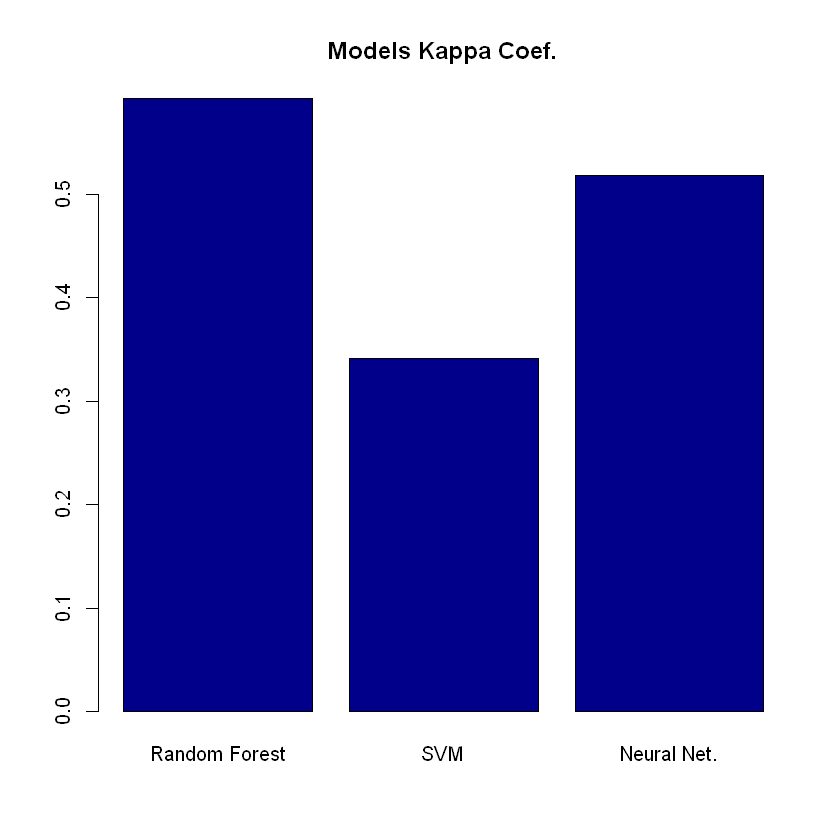

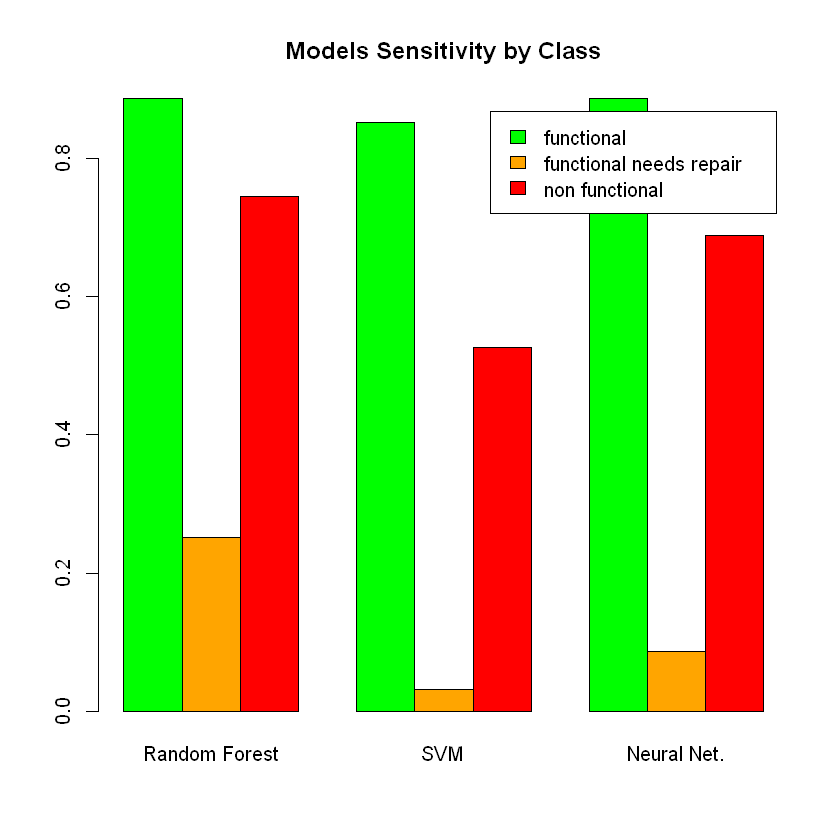

In [7]:
acTAB <-  matrix(c(acRF,acSVM,acNN),ncol=3,byrow=TRUE)
colnames(acTAB)<-c("Random Forest","SVM","Neural Net.")
barplot(as.table(acTAB),main="Models Accuracy",col=c("darkblue"))

kpTAB <-  matrix(c(kpRF,kpSVM,kpNN),ncol=3,byrow=TRUE)
colnames(kpTAB)<-c("Random Forest","SVM","Neural Net.")
barplot(as.table(kpTAB),main="Models Kappa Coef.",col=c("darkblue"))

sensTAB <-  matrix(c(sensRF,sensSVM,sensNN),ncol=3,byrow=TRUE)
rownames(sensTAB)<-c("Random Forest","SVM","Neural Net.")
colnames(sensTAB)<-c("functional","functional needs repair","non functional")

barplot(as.table(t(sensTAB)),main="Models Sensitivity by Class",beside=TRUE,col=c("green","orange","red"),legend = colnames(sensTAB))


### In this case the Random Forest implementation has shown to be better in each metric, allowing us to conclude that this model is performing better on the validation set.
### It is also important to note that each model struggle with the *function needs repair* class, there's a lot of false negative prediction in this class (shown by low Sensitivy levels) but also many false positive.